# Scikit-Learn Package

Steve Pittard wsp@emory.edu (citations to other sources are inline) 



## Back To The Beginning

It is implied that in predictive modeling the ultimate goal is to generate a model that could be reasonably applied to new data. As we have learned, it is best to train any model on a data set that has been (re)sampled in some way (e.g. K Fold CV) which should help provide a more realistic estimate of “out of sample” error.

In our earliest example we tried to predict the MPG from mtcars using a basic linear modeling function. As part of creating a model we can "score" the result using a specified performance measure. Before we do that, however, we’ll make a test / train pair. One way to do this is write our own functions to sample some proportion of a data frame. Keep in mind that We are trying to implement the following flow in our work. Acquaint yourelf with this process as it is quite common to the Machine Learning experience:

<img src="./pics/flow2.png" width=700 height=700>

So the above is a cleaned up version of a graphic we introduced earlier in the semester. Look at one or the other or both though they both contain basically the same information. My point here is drive home the idea that there are certain "meta" activities in machine learning, for example cross fold validation, that transcend a specific method. Thus it would be nice to have a framework to help implement these meta ideas. You are in luck because **scikit-learn** does exactly that.

<img src="pics/workflow.jpg" width ="530" height=530>


In [277]:
import pandas as pd
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

print(mtcars.head(),"\n")

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2 



<img src="./pics/mpgpredict.png" width=550 height=550>

In [278]:
# How many rows ?
print("Number of rows in the mtcars df:",len(mtcars))

# Let's sample 80% of the data into a training data set
prop = int(.8*len(mtcars))

train = mtcars[0:prop]
print("Number of rows in training set:\t", len(train))

# Let's sample 20% of the data into a test data set
test = mtcars[prop:prop+(len(mtcars)-prop)]
print("Number of rows in test set: \t", len(test))


Number of rows in the mtcars df: 32
Number of rows in training set:	 25
Number of rows in test set: 	 7


In [279]:
test

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
25,27.3,4,79.0,66,4.08,1.935,18.9,1,1,4,1
26,26.0,4,120.3,91,4.43,2.140,16.7,0,1,5,2
27,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


Let's write a function to do this.

In [280]:
def sampler(df=mtcars,prop=.80):
    
    # Let's sample 80% of the data into a training data set
    prop = int(prop*len(df))
    train = df[0:prop]
   
    # Let's sample 20% of the data into a test data set
    test = df[prop:prop+(len(df)-prop)]
    
    return([train,test])

train, test = sampler()
print("Length of taining:",len(train))
print("Length of test:\t",len(test))

Length of taining: 25
Length of test:	 7


We could actually write a helper function to do things like shuffle the data frame before we sample or specify whether to use boostrap sampling - if we wanted to. This winds up taking more work but gives us some generality.

In [281]:
def shuffler(length=32, boot=False):
    import random
    randomList = []
    done = False
    
    if (boot):
        for ii in range(0,length):
            randomList.append(random.randint(0,(length-1)))
    else:
        while not done:
            mynum = random.randint(0,(length-1))
            if (mynum not in randomList or len(randomList) < (length-1)):
                randomList.append(mynum)
            else:
                done = True    
    return(randomList)

shuffledList = shuffler()
shuffledList


[1,
 0,
 8,
 31,
 24,
 17,
 26,
 13,
 1,
 1,
 27,
 23,
 9,
 17,
 20,
 8,
 31,
 16,
 12,
 26,
 18,
 12,
 29,
 17,
 27,
 30,
 30,
 25,
 21,
 8,
 14,
 19,
 6,
 5,
 7]

In [156]:
def sampler(df=mtcars,prop=.80,shuffle=False,boot=False):
    
    if (shuffle,boot):
        shuffledList = shuffler(len(df))
        df = df.iloc[shuffledList]
    
    # Let's sample 80% of the data into a training data set
    prop = int(prop*len(df))
    train = df[0:prop]
   
    # Let's sample x% of the data into a test data set
    test = df[prop:prop+(len(df)-prop)]
    
    return([train,test])

train, test = sampler(prop=.8,boot=True)
print("Length of taining is:",len(train))
print("Length of test is:",len(test))

test

Length of taining is: 24
Length of test is: 7


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
23,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
15,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
10,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
30,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
11,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
13,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


## A Better Way

So if you've been paying attention in the previous lectures you will remember that I had use a method called "sample" with respect to Pandas dataframes. So why would you write your own sampling functions when you have something better and easier at your disposal ? This is entirely true.

In [282]:
mtcars.sample(n=len(mtcars)).head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
29,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
25,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
24,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
14,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
21,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2


In [7]:
def newsampler(df=mtcars,boot=False,prop=.8):
    
    if (boot):    
        df = df.sample(n=len(df),replace=True)
    else:
        df = df.sample(n=len(df))
    
    # Let's sample prop% of the data into a training data set
    prop = int(prop*len(df))
    train = df[0:prop]
   
    # Let's sample the rest of the data into a test data set
    test = df[prop:prop+(len(df)-prop)]
    
    return([train,test])

train, test = newsampler(prop=.7,boot=True)
test
    

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
29,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
20,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
28,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
23,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


So we could now use this to model the training data and later apply it to the test data. We explored this last time when we were using regression to predict outcomes on the fuel economy of the cars within the mtcars data frame. Remember that our performance metric is the RMSE (Root Mean Square Error) which is a very common metric for judging regression models. 

$$ RMSE = \sqrt\frac{\sum_i^n(P_i-O_i)^2}{n} $$

To accomplish the work, we'll use some functions from the StatsModels Python package which is a specialized group of tools for stastistical work.

<img src="./pics/statsmodels.png" width=700 height=700>

In [283]:
import statsmodels.api as sm 
train, test = newsampler()

# I'm doing the following to eliminate the Future Warnings
# resulting from use of the OLS methods in statsmodels

import warnings
warnings.filterwarnings('ignore')

# We define our own rmse function though scikit has some
# functions that might simplify this but it does't matter

def rmse(actual,predictions):
   from math import sqrt
   myrmse = sqrt(((predictions-actual)**2).mean())
   return round(myrmse,3)

# Do regression and figure out rmse for training 
    
result = sm.OLS(train.mpg,sm.add_constant(train.wt)).fit()
train_rmse = rmse(train.mpg,result.predict(sm.add_constant(train.wt)))
print("Train RMSE:", train_rmse)

test_rmse  = rmse(test.mpg,result.predict(sm.add_constant(test.wt)))
print("Test  RMSE:", test_rmse)

Train RMSE: 2.373
Test  RMSE: 4.695


## Scikit to The Rescue

By now you are probably fatigued with understanding the details of writing the code to split data, doing Cross Validation, storing the results, and looking at descriptive stats associated with the resulting RMSE. And this is all before considering the various parameters associated with whatever method we wish to implement.

Each function has its own set of requirements which may not extend to other functions. What we need (well, what we would like) is a framework to streamline this process and automate it as much as possible but not at the expense of understanding the results.

There is a module called [**scikit-learn**](https://scikit-learn.org/stable/) which can help make Machine learning a great deal easier by automating many activities that would otherwise be tedious and error prone. 

<img src="pics/scikit.png" width ="600" height=600>

From the project Github:

> scikit-learn is a Python module for machine learning built on top of SciPy and is distributed under the 3-Clause BSD license. The project was started in 2007 by David Cournapeau as a Google Summer of Code project, and since then many volunteers have contributed. See the About us page for a list of core contributors.

## Compared to R

scikit-learn is not really a direct competitor to anything in R, at least in my opinion. R is a statistical framework first and formost which means that it has always had many statistical functions, and what we now consider to be Machine Learning methods, readily available. Over time, R has offered packages like [caret](http://topepo.github.io/caret/index.html), [tidymodels](https://www.tidymodels.org/), and [mlr](https://mlr.mlr-org.com/) (now deprecated), which represent either front ends to standalone ML packages or a rewrite of various methods. In this regard, R has had a big head start on Python. Keep in mind that data frames, which are a native object in R, are not native to Python and it was only when the Pandas module was created, that we could get similar capability. 

Moreover, there is a wealth of online support for these various packages which simplifies ML projects in R. There is an excellent book called [Applied Predictive](http://appliedpredictivemodeling.com/) Modeling which, though it uses the caret pacakge as a default framework, provides a great overview of general considerations relative to Machine Learning and Predictive Modeling. 

All this said, the scikit-learn module leverages the fact that Python was and is an easy-to-use general programming language. This makes Python a great language to develop and deploy models. The scikit-learn module is an attempt at a ground-up framework to provide ML capability. While there have been other such Python implementations, scikit-learn has the current "mind share" in this space. In my view, if you are going to do any type of Predictive Modeling or Machine Learning in Python then scikit-learn is the way to go.

### Graphics

I won't hide my opinion here that I think that R graphics, particularly ggplot2, is superior to Python graphics such as matplotlib and seaborn. (There is a reason that the [plotnine](https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129) package exists to give ggplot2 capability to Python users). 

However, if you are going to be working in the Python universe then you should spend time understanding matplotlib and seaborn because much of the documentation and support literature you will encounter will make reference to these frameworks. 

Also if you have a MATLAB background then you already have some experience with matplotlib. The scikit-learn package has a number of built-in plot types that are peculiar to various algorithms so before you try to produce a plot you might first check to see if something already exists before trying to make your own plots. 

### R Equivalent Packages

R has two packages that implement the meta methods in the typical Machine Learning workflow: 1) [caret](https://topepo.github.io/caret/index.html) and 2) [tidymodels](https://www.tidymodels.org/) both of which are pretty solid packages. However, the latter is the more recent and actively developed. 

## Putting scikit-learn to Work

But we aren't here to talk about how to do this in R so let's focus on scikit-learn and all it has to offer. It’s easy to get lost in all that we have been doing up until this point so let’s review what the typical predictive modeling workflow will look like. 

   - Data Import (read in csv files, extractfrom a database, read from internet)
   - Do some Data Visualization
   - Data Prep (We haven’t done much of this just yet) 
  
       * Find Missing Data and perform imputation 
       * Scaling 
       * Create dummy variables
       * One hot encoding
       * Dimensionality Reduction
   
   
   - Data Splitting (training / test) 
   - Determine split ratio - K-Fold Cross Validation (repeated)
   - Modeling / Prediction
   - Evaluation

## Some Terminology

Here is some important information which is taken from the scikit-learn manual:

### Estimators 

Scikit-learn provides dozens of built-in machine learning algorithms and models, called estimators. Each estimator can be fitted to some data using its **fit** method.

#### Fitting and Predicting

    The fit method is provided on every estimator. It usually takes some samples X and targets y 

    Both X and y are usually expected to be numpy arrays or equivalent array-like data types, though some estimators work with other formats such as sparse matrices.

    Once the estimator is fitted, it can be used for predicting target values of new data. You don’t need to re-train the estimator:

### Transformers and pre-processors

Machine learning workflows are often composed of different parts. A typical pipeline consists of a pre-processing step that transforms or imputes the data, and a final predictor that predicts target values. Scaling is a common transformer

In scikit-learn, pre-processors and transformers follow the same API as the estimator objects. The transformer objects don’t have a **predict** method but rather a **transform** method that outputs a newly transformed sample matrix **X**.

### Pipelines: chaining pre-processors and estimators

Transformers and estimators (predictors) can be combined together into a single unifying object: a Pipeline. The pipeline offers the same API as a regular estimator: it can be fitted and used for prediction with fit and predict. As we will see later, using a pipeline will also prevent you from data leakage, i.e. disclosing some testing data in your training data.

### Model Evaluation

Fitting a model to some data does not entail that it will predict well on unseen data. This needs to be directly evaluated. There are functions such as the **train_test_split** helper that splits a dataset into train and test sets, but scikit-learn provides many other tools for model evaluation, in particular for cross-validation which is something we have discussed previously. 


### Naming Confusion

If you search around on the internet you will soon suspect that the terms "scikit-learn" and "sklearn" are often used interchangeably and they refer to the same machine learning library in Python. This is true. 

The name **"scikit-learn"** is the official name of the library and is derived from **"SciPy Toolkit" (SciKit)**. That said, don't be conused into thinking that "SciPy" is the same as "scikit-learn" because it isn't. **SciPy** is used for general scinetific computing where as **scikit-learn** is basically built on top of **SciPy** in part. 

**"sklearn"** is a commonly used abbreviation for **"scikit-learn"** and is often used in informal contexts, documentation, and discussions due to its brevity.

Both terms refer to the same library and represent the same set of functionalities for machine learning tasks in Python.


The scikit-lean learn module provides a uniform interface for calling different algorithms while simplifying the data splitting and calculation of various performance measures. It supports many different model types and also provides the ability to tune hyper parameters. Here are some of the features:

- Classification:  SVM, nearest neighbors, random forest
- Regression:  SVR, nearest neighbors, random forest
- Clustering:  k-Means, spectral clustering, mean-shift
- Preprocessing:  Transformation, scaling, feature extraction
- Dimensionality Reduction:  k-Means, feature selection, non-negative matrix factorization
- Model Selection:  Grid search, cross validation, metrics

### Naming Conventions

So we wrote a function to sample some proportion of a data frame to create a training data set and to also have a test data set comprised of the remaining data. Common training and test proportions include 80 / 20, 70 / 30, and 60 / 40. 

But we didn't really need to write a function as the scikit-learn package has a function that will us do this. We'll also introduce a convention used in Python Machine Learning where we split the label (what is being predicted) into a separate structure. 

The remaining information represents the predictor variable(s). In the parlance of the Python, we refer to the former as **"y"** (lower case) and the latter as **"X"** (upper case). We do this in large part because there is a helper function called **train_test_split** which expects this format to do its work. 

In [284]:
from sklearn.model_selection import train_test_split
import numpy as np

# Let's set up some simple example data - nothing complicated
X = np.arange(12)
y = range(6)

print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [285]:
# Let's reshape predictions to be a matrix
X = X.reshape(6,2)
print(X)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]


In [286]:
# See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# We set a random_state variable to make this reproducible across calls
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state=123)

In [287]:
# Look at the training data
print(X_train)
print()
print(y_train)

[[ 8  9]
 [ 0  1]
 [ 4  5]
 [10 11]]

[4, 0, 2, 5]


In [288]:
# Look at the test data
print(X_test)
print()
print(y_test)

[[2 3]
 [6 7]]

[1, 3]


Of course we can now look at one of previous examples and factor in the train_test_split function. We also learn how scikit-learn likes to return data. Note that while we do not have to use the variable names X_train, X_test and so on, this is something of a convention you will see heavily used in the community. This is why I stick with it. 

In [289]:
# Separate our dataframe into an X, y pair
y = mtcars.mpg
X = mtcars.drop('mpg',axis=1)

# Next we create a training and test pair with 80 / 20 proportions
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

print("Dimensions of X_train", X_train.shape)
print("Dimensions of X_test", X_test.shape)

X_train.head()

# Generate the OLD model using the trainining data
result = sm.OLS(y_train,sm.add_constant(X_train.wt)).fit()

# Compute the training error
train_rmse = rmse(y_train,result.predict(sm.add_constant(X_train.wt)))

# Now compute the testing error
test_rmse  = rmse(y_test,result.predict(sm.add_constant(X_test.wt)))

# What do we have ? 
print("Train and Test RMSE:",(train_rmse, test_rmse))

Dimensions of X_train (25, 10)
Dimensions of X_test (7, 10)
Train and Test RMSE: (3.166, 2.076)


So this is helpful in that we don't need to write our own sampler function. In fact, if you look for examples on Google you will rarely see situations wherein someone created and consistently used their own sample function although it is not a bad thing to do. It's just that the ML community prefers to leverage what scikit-learn has to offer so you will see the **train_test_split** function used extensively. This helps with the concept of **reproducibility**.

Of course, running one iteration on a train / test pair isn't very useful. We already discovered that K-fold cross validation is a technique to split up a data set into K-folds and systematically build training sets out of the combined K-1 folds while use the "holdout" fold as a test data set at some point in the process. 

<img src="pics/kf33.png" width ="600" height=600>


This helps address situations wherein large variation due to outliers might be present in one fold but not another. the ultimatel goal is to build a model on a number of training data sets with the hopes that we can better predict model performance on unseen data. Here were use a helper function called **KFold**. The function handles the chopping of the data for us. 

In [290]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True,random_state=125)
print(kf)

KFold(n_splits=3, random_state=125, shuffle=True)


In [291]:
# Let's set up some simple example data - nothing complicated
d = {'gene1': [.3, .9, .7, .4, .3, .5], 
     'gene2': [.10, .35, .2, .88, .5, .4], 
     'target': [1, 0, 0 ,1, 0, 1]}

# Create data frame
mydf = pd.DataFrame(d)

# Get the X and y vals
y = mydf.target
X = mydf.drop('target',axis=1)

print(X)
print()
print(y)

   gene1  gene2
0    0.3   0.10
1    0.9   0.35
2    0.7   0.20
3    0.4   0.88
4    0.3   0.50
5    0.5   0.40

0    1
1    0
2    0
3    1
4    0
5    1
Name: target, dtype: int64


In [292]:
# So we can now chop up our X data frame into splits
kf.get_n_splits(X)

3

In [293]:
for train_index, test_index in kf.split(X):
    
    # This prints out the indices NOT the actual values
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [2 3 4 5] TEST: [0 1]
TRAIN: [0 1 2 5] TEST: [3 4]
TRAIN: [0 1 3 4] TEST: [2 5]


In [294]:
for train_index, test_index in kf.split(X):
    
    # This prints out the indices NOT the actual values
    print("TRAIN INDEX:", train_index, "TEST INDEX:", test_index,"\n")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    print(X_train)
    print()
    print(X_test)
    print()

TRAIN INDEX: [2 3 4 5] TEST INDEX: [0 1] 

   gene1  gene2
2    0.7   0.20
3    0.4   0.88
4    0.3   0.50
5    0.5   0.40

   gene1  gene2
0    0.3   0.10
1    0.9   0.35

TRAIN INDEX: [0 1 2 5] TEST INDEX: [3 4] 

   gene1  gene2
0    0.3   0.10
1    0.9   0.35
2    0.7   0.20
5    0.5   0.40

   gene1  gene2
3    0.4   0.88
4    0.3   0.50

TRAIN INDEX: [0 1 3 4] TEST INDEX: [2 5] 

   gene1  gene2
0    0.3   0.10
1    0.9   0.35
3    0.4   0.88
4    0.3   0.50

   gene1  gene2
2    0.7    0.2
5    0.5    0.4



So now we could try this out with our familiar mtcars dataframe

In [295]:
# Split 
kf = KFold(n_splits=4)
print("Number of folds:", kf.get_n_splits(mtcars))

Number of folds: 4


So now we can look at the indices generated by **KFold**. We can then train our model on each of the "combined" folds and then apply it to the test fold. In this case we have 4 folds but we could experiment with various numbers. Our data isn't that large so we won't do that. 

In [296]:
for train_index, test_index in kf.split(mtcars):
    print("TRAIN:", train_index, "\n","TEST:", test_index,"\n")

TRAIN: [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31] 
 TEST: [0 1 2 3 4 5 6 7] 

TRAIN: [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31] 
 TEST: [ 8  9 10 11 12 13 14 15] 

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31] 
 TEST: [16 17 18 19 20 21 22 23] 

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 
 TEST: [24 25 26 27 28 29 30 31] 



In [297]:
def rmse(actual,predictions):
   from math import sqrt
   myrmse = sqrt(((predictions-actual)**2).mean())
   return round(myrmse,3)

X = mtcars.drop('mpg',axis=1)
y = mtcars.mpg

scores = []

for fold_number, (train_index, test_index) in enumerate(kf.split(mtcars)):

    # Do regression and figure out rmse for training and test
    
    X_train, X_test = mtcars.iloc[train_index], mtcars.iloc[test_index]

    result = sm.OLS(X_train.mpg,sm.add_constant(X_train.wt)).fit()
    train_rmse = rmse(X_train.mpg,result.predict(sm.add_constant(X_train.wt)))
    test_rmse  = rmse(X_test.mpg,result.predict(sm.add_constant(X_test.wt)))
    
    scores.append([fold_number,train_rmse,test_rmse])
    
rmse_errors = pd.DataFrame(scores,columns=['fold_number','train','test'])
print(rmse_errors)

   fold_number  train   test
0            0  3.110  2.440
1            1  3.277  1.879
2            2  2.070  4.821
3            3  3.087  2.571


In [298]:
import numpy as np
np.mean(rmse_errors).round(2)

2.44

In [299]:
rmse_errors.describe()

,fold_number,train,test
count,4.000000,4.000000,4.000000
mean,1.500000,2.886000,2.927750
std,1.290994,0.550549,1.297362
min,0.000000,2.070000,1.879000
25%,0.750000,2.832750,2.299750
50%,1.500000,3.098500,2.505500
75%,2.250000,3.151750,3.133500
max,3.000000,3.277000,4.821000


## Getting Better

So this nice in that the **KFolds** function does the chopping up of the data for us. We don't have to write our own function. So one thing that we do when using any machine learning framework in any languahe is to make a distinction between what is being predicted, in this case the **mpg** variable, and the data being used to make the prediction. 

In scikit-learn one typically uses the nomenclature of **y** (lower case) to refer to the former and **X** (upper case) to refer to the latter. Note that while this naming convention isn't required it is a popular convention. So I'll just rewrite what we have above.

scikit-learn also has a number of built in metrics / cost functions that we could use instead of using our own. 

<img src="pics/rm.png" width ="600" height=600>

In [300]:
from sklearn.metrics import mean_squared_error

def rmse(actual,predictions):
   from math import sqrt
   myrmse = sqrt(((predictions-actual)**2).mean())
   return round(myrmse,3)

X = mtcars.drop('mpg',axis=1)
y = mtcars.mpg

scores = []
import statsmodels.api as sm
for fold_number, (train_index, test_index) in enumerate(kf.split(mtcars)):
    
    ## Get Training Matrix and Vector

    X_train = X.iloc[train_index]
    y_train = y[train_index]

    ## Get Testing Matrix Values

    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    # Create the model   
    result = sm.OLS(y_train,sm.add_constant(X_train.wt)).fit()
    
    # Use this result to make training and test predictions
    train_preds = result.predict(sm.add_constant(X_train.wt))
    test_preds  = result.predict(sm.add_constant(X_test.wt))
    
    # Now find the RMSE using the respective predictions
    train_rmse = np.sqrt(mean_squared_error(y_train,train_preds))
    test_rmse  = np.sqrt(mean_squared_error(y_test,test_preds))
    
    scores.append([fold_number,train_rmse,test_rmse])
    
rmse_errors = pd.DataFrame(scores,columns=['fold_number','train','test'])
print(rmse_errors)


   fold_number     train      test
0            0  3.109674  2.439916
1            1  3.276833  1.879322
2            2  2.070390  4.821133
3            3  3.086567  2.571099


Also understand that there are performance metrics available to using the **sklearn.metrics** functions to help us. We can get the Mean Squared Error and then take the square root of that to obtain the RMSE / Root Mean Squared Error.  

In [301]:
from sklearn.metrics import mean_squared_error

X = mtcars.drop('mpg',axis=1)
y = mtcars.mpg

scores = []
import statsmodels.api as sm
for fold_number, (train_index, test_index) in enumerate(kf.split(X)):
    
    ## Get Training Matrix and Vector

    X_train = X.iloc[train_index]
    y_train = y[train_index]

    ## Get Testing Matrix Values

    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    
#   X_train, X_test = mtcars.iloc[train_index], mtcars.iloc[test_index]

    result    = sm.OLS(y_train,sm.add_constant(X_train.wt)).fit()
    train_mse = mean_squared_error(y_train,result.predict(sm.add_constant(X_train.wt)))
    test_mse  = mean_squared_error(y_test,result.predict(sm.add_constant(X_test.wt)))
    
    train_rmse = np.sqrt(train_mse)
    test_rmse  = np.sqrt(test_mse)
    
    scores.append([fold_number,train_rmse,test_rmse])
    
rmse_errors = pd.DataFrame(scores,columns=['fold_number','train','test'])
print(rmse_errors)

   fold_number     train      test
0            0  3.109674  2.439916
1            1  3.276833  1.879322
2            2  2.070390  4.821133
3            3  3.086567  2.571099


### Linear Regression

So it turns out that scikit-learn has its own methods for Linear Regression that include various options such as to use Ridge or Lasso. We'll now replace the simple OLS method with something from scikit-learn. You should become familiar with going to the reference page for the various [scikit functions](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)


In [302]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

X = mtcars.wt
y = mtcars.mpg

kf = KFold(n_splits=4)

scores = []

for fold_number, (train_index, test_index) in enumerate(kf.split(X)):
    
    ## Get Training Matrix and Vector

    X_train = X.iloc[train_index]
    y_train = y[train_index].values.reshape(-1,1)

    ## Get Testing Matrix Values

    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index].values.reshape(-1,1)

    model = LinearRegression()
    
    # All scikit model methods (aka 'estimators') have specific methods
    # such as predict and fit
    
    # Notice that the fit function is "in place"
    model.fit(X_train.values.reshape(-1,1),y_train)
    
    y_train_preds = model.predict(X_train.values.reshape(-1,1))
    y_test_preds  = model.predict(X_test.values.reshape(-1,1))
     
    train_mse = mean_squared_error(y_train,y_train_preds)
    test_mse  = mean_squared_error(y_test,y_test_preds)
    
    train_rmse = math.sqrt(train_mse)
    test_rmse  = math.sqrt(test_mse)
    
    scores.append([fold_number,train_rmse,test_rmse])
    
rmse_errors = pd.DataFrame(scores,columns=['fold_number','train_rmse','test_rmse'])
print(rmse_errors)


   fold_number  train_rmse  test_rmse
0            0    3.109674   2.439916
1            1    3.276833   1.879322
2            2    2.070390   4.821133
3            3    3.086567   2.571099


### Numpy Input

The thing with scikit-learn functions is that they want input in a particular format so some type of conversion is ususally required which is why you saw things like the **X_test.values.reshape(-1,1)** statement above. Sometimes it's easier to convert the pandas data frame into an array. In this example, we'll do just the regression piece:

In [303]:
from sklearn.metrics import mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

mtvals = mtcars.values            # creates a numpy array
type(mtvals)                      # Observe the data type

y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:11]      # Gets everything BUT the mpg column

# Setup a new model
model = LinearRegression()

# fit the model
model.fit(X,y)

# Look at the equation coeeficients 
print("Regression equation coefficients:\n", model.coef_.round(3))

# Look at the intercept
print("\nRegression equation intercept:",model.intercept_.round(3))

# Do a prediction
y_preds = model.predict(X)

# Get mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y, y_preds)))

# Get R^2
print('Coefficient of determination: %.2f'
      % r2_score(y, y_preds))

Regression equation coefficients:
 [-0.111  0.013 -0.021  0.787 -3.715  0.821  0.318  2.52   0.655 -0.199]

Regression equation intercept: 12.303
Root Mean squared error: 2.15
Coefficient of determination: 0.87


### Fit in Place

So when using **scikit** it's important to note that estimators support a **fit** method that assumes you want to, well, fit something with that something usually being an **X** array of data and a **y** variable to be predicted in some way. That could be regression or classification. You can always count on scikit estimators to support the **fit** method. There are other methods such as **predict** and **score** also. 

So **scikit** supports someting called the "fit in place" idea. This idea revolves around the principle of modifying the data or model object itself during the fitting process rather than creating a new object. This approach is commonly used in transformers (such as preprocessing steps) and estimators (such as machine learning models).

In scikit-learn, the fit method is used to train a model or learn from the data, and it typically modifies the internal state of the object to capture the patterns in the data. For transformers, the fit method often computes statistics or learns parameters from the data, which are then used to transform the data during the transform step.

In [304]:
# Note that the following is nnot necessary or recommended
# You don't need to save the fitted version to a new variable

some_model = LinearRegression()
myreg = some_model.fit(X,y)

# The following is encouraged - you can fit "in place"

some_model = LinearRegression()
some_model.fit(X,y)

# Check this out
some_model = LinearRegression()

# Inspect some_model
some_model


LinearRegression()

It might be helpful to know that most models have a default score method that defaults to something that makes sense for the method being used. In the case of regression, the default scoring metric is the R^2 value

<center><img src="./pics/ch_5_reg_score.png"></center>

In [305]:
model.score(X,y).round(2)

0.87

In general any model has a number of attributes

<img src="pics/lrout.png" width ="450" height=450>


In [306]:
model.coef_.round(3)

array([-0.111,  0.013, -0.021,  0.787, -3.715,  0.821,  0.318,  2.52 ,
        0.655, -0.199])

### Other Methods

So conveniently, you can use other "estimators" such as a Decision Tree Regressor. This too supports the "fit in place" method. Obviously there will be different possible arguments to the **DecisonTreeRegressor** estimator compared to the **LinearRegression** estimator. That makes sense because they implement different algorithms. The point is that as estimators they support common methods. 

Root Mean squared error: 0.00


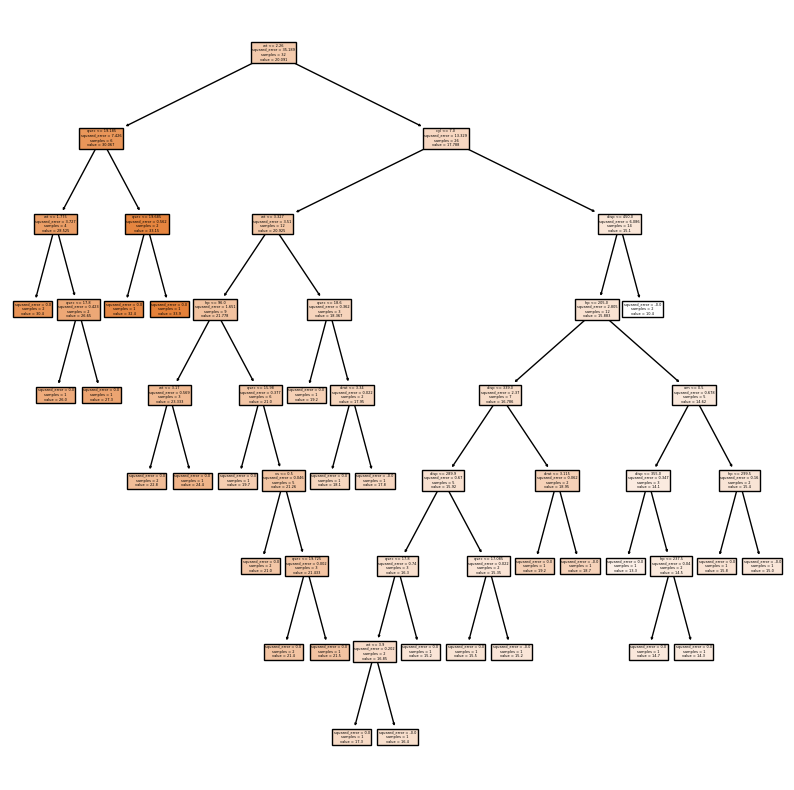

In [307]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

# Setup a new model
dt_model =  DecisionTreeRegressor(random_state=0)

# fit the model
dt_model.fit(X,y)

# Do a prediction
y_preds = dt_model.predict(X)

# Get mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y, y_preds)))

# Plot the tree 
plt.figure(figsize=(10,10))
myt = tree.plot_tree(dt_model,feature_names=list(mtcars.columns[1:10]),filled=True)


<img src="./pics/methodsdt.png" width=600 height=600>

### Neural Networks

It might be surprising that scikit-learn implements a Neural Network estimator although it is limited in comparison to the powers of PyTorch. Nonetheless, it provides all the parameters essential to creating a multi-layer perceptron.

In [308]:
from sklearn.neural_network import MLPRegressor

# Setup a new model
mlp_model = MLPRegressor(hidden_layer_sizes=(200, 50), activation='relu', solver='adam', alpha=0.0001,
                   batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                   power_t=0.5, max_iter=500, shuffle=True, random_state=None,
                   tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
                   nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1)
# fit the model
mlp_model.fit(X,y)

# Do a prediction
y_preds = mlp_model.predict(X)

# Get mean squared error
print('Training Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y, y_preds)))

# Print the R^2 value
print('R-Squared value: %.2f' % mlp_model.score(X,y))

Training Root Mean squared error: 1.40
R-Squared value: 0.94


## A Small Review

So now want to clean all of this up into something that can serve as an example for your future work. Things are kind of messy right now so let's review what it is we would generally want to do:

1. Split a data frame into what is being predicted vs the predictor variables
2. Use the training data as a source against which to do the cross fold valiation
3. For each fold, apply whatever model you want (e.g. Linear Regression) and capture metrics
4. Look at the performance metric(s) (e.g. RMSE) across each fold or in aggregate

In [309]:
ii = 0
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

rmse_train_info = []
rmse_test_info = []

mtvals = mtcars.values            # creates a numpy array

y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

kfold = KFold(3,shuffle=True,random_state=14)

# Main processing loop for the folds

for train_index, test_index in kfold.split(X, y):
  # split data coming from each of the 4 folds
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        
        # Initialize a model
        regress = LinearRegression()
        
        # Fit the Model
        regress.fit(X_train,Y_train)
        
        # Predict the target on the training dataset
        predict_train = regress.predict(X_train)
  
        # Root Mean Squared Error on training dataset
        rmse_train = mean_squared_error(Y_train,predict_train)**(0.5)
        print("Train RMSE for loop",ii,"is:", rmse_train.round(3))
       
        # Append the rmse to the rmse_train_info vector
        rmse_train_info.append(rmse_train)
        
        # Now let's do a prediction on the test data
        predict_test = regress.predict(X_test)
        
        # Root Mean Squared Error on training dataset
        rmse_test = mean_squared_error(Y_test,predict_test)**(0.5)
        print("Test  RMSE for loop",ii,"is:", rmse_test.round(3),"\n")
       
        # Append the rmse to the rmse_test_info vector
        rmse_test_info.append(rmse_test)

        ii = ii+1
        

Train RMSE for loop 0 is: 1.916
Test  RMSE for loop 0 is: 2.904 

Train RMSE for loop 1 is: 1.937
Test  RMSE for loop 1 is: 4.735 

Train RMSE for loop 2 is: 1.907
Test  RMSE for loop 2 is: 3.278 



## Easier Cross Validation 

Or, we could look at what scikit-learn can do for us. The following introduces the  **cross_val_score** and **cross_validate** functions which provide a wrapper around a given **kfolds** object while also applying a predefined scoring method. While this approach results in less code it also provides less transparency. So what we do here is:

  - Create a Model object (e.g. Regression)
  - Specify one or more scoring metrics
  - Create a KFold object with at least two folds
  - Pass the above information to the cross_validate function
  
The **cross_validate** function allows you to implement multiple scoring methods whereas **cross_val_score** allows only one scoring method. I'm not entirely sure why there are two different methods and it was confusing to me when I first encountered these but that's the way it is. 

In [310]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

mtvals = mtcars.values  # Create an array version of the data
y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

# Setup the model 

model = LinearRegression()

# We have to designate a scoring metric 
mse = make_scorer(mean_squared_error)

# Set up some folds
kfold = KFold(n_splits=4,shuffle=True,random_state=4)

# The cross_validate function handles the execution of the model
# as well as the management of the folds

cv  = cross_validate(model, X, y, scoring=(mse), cv=kfold, return_train_score=True)

# Here we print out the rmse of the test / holdout data
print("Test RMSE per fold:",(cv['test_score']**0.5))

# Look at the mean of this RMSE array
print("Mean Test  RMSE:",(cv['test_score']**0.5).mean().round(2))

# Look at the mean of this RMSE array
print("Mean Train RMSE:",(cv['train_score']**0.5).mean().round(2))


Test RMSE per fold: [4.21802769 3.43818956 2.07681216 3.87776313]
Mean Test  RMSE: 3.4
Mean Train RMSE: 1.94


A nice side effect of using the scikit approach is that we can easily substitute in other methods as long as they make sense of course. In other words, since we are predicting a continuous outcome we need to select a method that supports this intent. Let's try Ridge regression. 

In [311]:
from sklearn import tree
from sklearn.linear_model import Ridge
    
# Setup the model 

model = Ridge()

# We have to designate a scoring metric 
mse = make_scorer(mean_squared_error)

# Set up some folds
kfold = KFold(n_splits=4)

# The cross_validate function handles the execution of the model
# as well as the management of the folds

cv  = cross_validate(model,X,y,scoring=(mse), cv=kfold, return_train_score=True)

# Here we print out the rmse of the test / holdout data
print("Test RMSE per fold:",(cv['test_score']**0.5))

# Look at the mean of this RMSE array
print("Mean Test  RMSE:",(cv['test_score']**0.5).mean().round(2))

# Look at the mean of this RMSE array
print("Mean Train RMSE:",(cv['train_score']**0.5).mean().round(2))

Test RMSE per fold: [2.33626326 2.9428611  4.59536042 2.57621531]
Mean Test  RMSE: 3.11
Mean Train RMSE: 1.97


## Wow! 
So, technically if we just want to do basic K-Fold Cross Validation we don't even need to create a K-Fold object. We just tell the cross_validate function how many folds we want directly. This is fine for basic K-Fold but if we wanted to use Repeated or Stratified Validation we couldn't do this. 

<span style='color:red; font-size:16px'>Look at how easy this is with one line of code!</span>


In [312]:
cv  = cross_validate(model,X,y,scoring=(mse), cv=4, return_train_score=True)
cv

{'fit_time': array([0.00282717, 0.00169802, 0.00150585, 0.00133085]),
 'score_time': array([0.00085783, 0.00085688, 0.00069404, 0.00064611]),
 'test_score': array([ 5.45812602,  8.66043144, 21.11733743,  6.63688534]),
 'train_score': array([4.91036687, 4.91015578, 1.63289847, 4.67826388])}

   fit_time  score_time  test_score  train_score
0  0.002827    0.000858    5.458126     4.910367
1  0.001698    0.000857    8.660431     4.910156
2  0.001506    0.000694   21.117337     1.632898
3  0.001331    0.000646    6.636885     4.678264


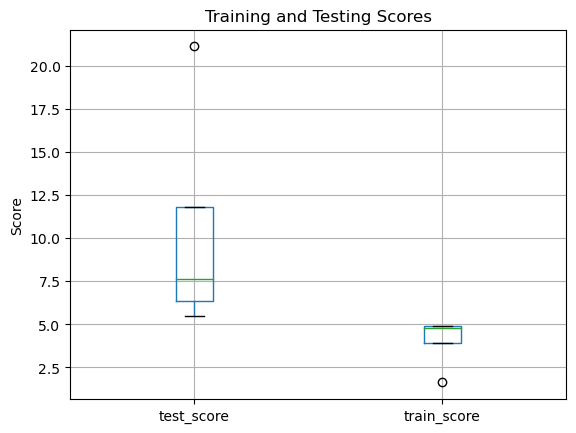

In [313]:
cv_df = pd.DataFrame(cv)
print(cv_df)

# Plot a boxplot of training and testing score

cv_df[['test_score', 'train_score']].boxplot()

# Adding labels and title
plt.ylabel('Score')
plt.title('Training and Testing Scores')

# Show the plot
plt.show()

We could always use Repeated Cross Fold Validation to repeat a cross fold validation multiple times. This is fairly straightforward but you have to know what function to call. 

In [314]:
from sklearn.model_selection import RepeatedKFold

model = Ridge()

# We have to designate a scoring metric 
mse = make_scorer(mean_squared_error)

# Set up some folds
repeat_kfold = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)

# The cross_validate function handles the execution of the model
# as well as the management of the folds

cv  = cross_validate(model,X,y,scoring=(mse), cv=repeat_kfold, return_train_score=True)

# Here we print out the rmse of the test / holdout data
print("Test RMSE per fold:",(cv['test_score']**0.5))

# Look at the mean of this RMSE array
print("Mean Test RMSE:",(cv['test_score']**0.5).mean().round(2))

# Look at the mean of this RMSE array
print("Mean Train RMSE:",(cv['train_score']**0.5).mean().round(2))


Test RMSE per fold: [4.47752136 2.44282638 2.84717458 2.64975775 2.8450318  2.52470336
 3.3578655  2.98819652 1.87052263]
Mean Test RMSE: 2.89
Mean Train RMSE: 2.0


So it is important to know that there are a number of built in scoring metrics available for regression and classification. These are available to assist with the evaluation of any models that you make and could simplify your work. Check the [reference](https://scikit-learn.org/stable/modules/model_evaluation.html) page for a more detailed discussion of such metrics. 

<img src="pics/rm.png" width ="600" height=600>

In [315]:
model = Ridge()

# These metrics are known to scikit
scoring = {'neg_mean_squared_error': 'neg_mean_squared_error',
           'r2':'r2'}

# Set up some folds
repeat_kfold = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)

# The cross_validate function handles the execution of the model
# as well as the management of the folds

cv  = cross_validate(model,
                     X,y,
                     scoring=scoring, 
                     cv=repeat_kfold, 
                     return_train_score=True)

# Here we print out the rmse of the test / holdout data
print("Test RMSE per fold:",np.sqrt(np.abs(cv['test_neg_mean_squared_error'])))

# Here we print out the r2of the test / holdout data
print("Test R2 per fold:",cv['test_r2'])


Test RMSE per fold: [4.47752136 2.44282638 2.84717458 2.64975775 2.8450318  2.52470336
 3.3578655  2.98819652 1.87052263]
Test R2 per fold: [0.69985352 0.62492573 0.34826034 0.79611432 0.80087933 0.74496963
 0.66057129 0.75612977 0.89198932]


## Hyperparameters

Linear Regression is straighforward and there aren't many arguments to supply to the function although there are a couple of “hyperparameters” which are arguments to a given method that you can set before you call the method. In this case there are two hyperparameters called "alpha" and "solver" that assume default variables if we don’t supply values. There is even a function called **RidgeCV** which will handle some of this stuff for us although it is specific to the **Ridge** method. Here is how we could use it to find the best value for **alpha**. 

In [316]:
from sklearn.linear_model import RidgeCV

cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)

# We have to designate a scoring metric 
mse = make_scorer(mean_squared_error)

# define search
search = RidgeCV(alphas=np.arange(0.1, 1, 0.1), cv=cv, scoring=(mse))

# perform the search
results_ridge = search.fit(X, y)

print('RidgeCV RMSE: %.3f' % results_ridge.best_score_**0.5)
print('RidgeCV Best Alpha: %s' % results_ridge.alpha_)

RidgeCV RMSE: 3.232
RidgeCV Best Alpha: 0.1


We can also call a more general function to handle the search for an ideal set of parameters in relation to optimizing target metric. If our desired score is to minimize the RMSE then we can indicate this in the scoring paramter. We can also provide a parameter grid with values we want to be evaluated as part of this optimization.

In [317]:
from sklearn.model_selection import GridSearchCV

# create model
model = Ridge()

# Create a grid of parameters to be evaluated. Note that
# this is specific to the method being used
param_grid={'alpha': np.arange(0,1,0.1)}

# do the grid search
search = GridSearchCV(model, param_grid, scoring=(mse), cv=cv, n_jobs=-1)

# Get the results
results_gridsearch = search.fit(X, y)

# summarize
print('Grid_Search RMSE: %.3f' % results_gridsearch.best_score_**0.5)
print('Grid_Search Config: %s' % results_gridsearch.best_params_)

Grid_Search RMSE: 3.371
Grid_Search Config: {'alpha': 0.0}


In [318]:
# Let's expand the parameter dictionary to include "solver"

model = Ridge()

# Here we add in additional parameters into the grid
param_grid={'alpha': np.arange(0,1,0.1),
            'solver': ['svd', 'cholesky', 'lsqr']}

search = GridSearchCV(model, param_grid, scoring=(mse), cv=cv, n_jobs=-1)

# perform the search
results_gridsearch = search.fit(X, y)

# summarize
print('Grid_Search RMSE: %.3f' % results_gridsearch.best_score_**0.5)
print('Grid_Search Best Parameter Config: %s' % results_gridsearch.best_params_)

Grid_Search RMSE: 3.371
Grid_Search Best Parameter Config: {'alpha': 0.0, 'solver': 'svd'}


## The Null Model

Keep in mind that we are assuming that whatever we are doing (or plan to do) is better than doing little or nothing. That is, we could just make our model reflect the average MPG of the training data and leave it at that. After all, why go to the trouble of writing code and testing out different methods if we could do just as well by going with the average MPG approach. scikit-learn has what is known as a "dummy" model function that can implement this "method". First, check out this graph which shows us how the Null model might look.

Text(0.5, 1.0, 'Null Model - Mean MPG')

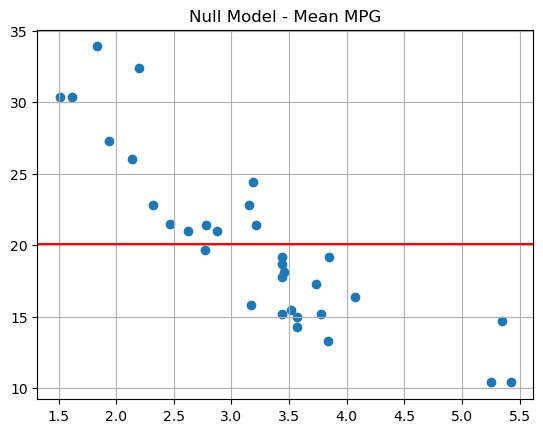

In [319]:
import matplotlib.pyplot as plt
plt.scatter(mtcars.wt,mtcars.mpg)
plt.axhline(np.mean(mtcars.mpg), color="red")
plt.grid()
plt.title("Null Model - Mean MPG")

Now we'll implement the model using scikit-learn

In [333]:
# Let's import what we need - could be redundant but
# this will show you what you need to reproduce this

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from numpy import mean
from numpy import absolute
from numpy import sqrt

# Reread the mtcars file
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

# Create the X, y combo
X = mtcars.drop("mpg",axis=1)
y = mtcars.mpg

# Now we make a Dummy model that uses the mean of the dependent variable
dummy_mean = DummyRegressor(strategy='mean')

# Set up a scores list to collect RMSE as we do KFold validation
scores = []

# try with KFold
kf = KFold(n_splits=4,shuffle=True)
for train_index, test_index in kf.split(X):
     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
     y_train, y_test = y[train_index], y[test_index]
    
     dummy_mean.fit(X_train,y_train)
     ypreds = dummy_mean.predict(X_test)
     scores.append(mean_squared_error(y_test,ypreds,squared=False))

print("Mean RMSE is %f" % mean(scores))

# The RMSE emerging from the following  should be comparable to what we did above 
# After all, this is just an automatic way of doing the above that uses the same
# folds created by the KFold object

cross_val_scores = cross_val_score(dummy_mean, 
                                   X_train, 
                                   y_train, 
                                   scoring='neg_mean_squared_error',
                                   cv=kf, 
                                   n_jobs=-1)

print("Mean RMSE for cross_val_score is %f " % sqrt(mean(absolute(cross_val_scores))))

Mean RMSE is 5.797848
Mean RMSE for cross_val_score is 5.494702 


So the RMSE is not particularly different. After all, we used the same folds and the second approach just implemented **cross_val_score** function to make things easier albeit less transparent. The larger point here is that I wanted to show how to implement a null / baseline model using scikit. 

We've already looked at a number of examples involving regression and variants thereof but here is one more just to contrast this with the dummy model. Notice here we are suing cross_val_score which is not substantially different from cross_validate except that it allows only one scoring method to be used. 

In [334]:
# Look at an actual Regresssion Model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cross_val_scores = cross_val_score(reg, 
                                   X, 
                                   y, 
                                   scoring='neg_mean_squared_error',
                                   cv=kf, 
                                   n_jobs=-1)
print("Mean RMSE for cross_val_score is %f " % sqrt(mean(absolute(cross_val_scores))))

Mean RMSE for cross_val_score is 4.258313 


It's important to know that we don't have to create a separate KFold object to do cross fold validation. We can just tell **cross_validate** or **cross_val_score** to use its own validation just by supplying the desired number of folds. Here we specify 3 folds.

In [336]:
cross_val_scores = cross_val_score(reg, 
                                   X, 
                                   y, 
                                   scoring='neg_mean_squared_error',
                                   cv=3, 
                                   n_jobs=-1)
print("Mean RMSE for cross_val_score is %f " % sqrt(mean(absolute(cross_val_scores))))

Mean RMSE for cross_val_score is 4.540624 


### Trying Different Estimators

So the general idea is to be able to easily "drop in" new methods (also known as "estimators") without having to change the workflow too much. For exampe, we could easily implement regression using Support Vector Regression along with the existing cross validation approach. Of course, we have to load the appropriate function to implement the SVR() estimator but we don't need to change much else. Of course, this isn't always going to be so easy because some methods might, for example, require scaling of the data or some other type of transformation although from a workflow point of view, you should not have to change your thinking very much. 

In [337]:
# Let's do Support Vector Regression
from sklearn.svm import SVR
svr_mod = SVR()
cross_val_scores = cross_val_score(svr_mod, 
                                   X, 
                                   y, 
                                   scoring='neg_mean_squared_error',
                                   cv=3, 
                                   n_jobs=-1)
print("Mean RMSE for cross_val_score using SVR is %f " % sqrt(mean(absolute(cross_val_scores))))

Mean RMSE for cross_val_score using SVR is 4.473371 


### Comparing Multiple Models

Let's say that we want to assess a number of models at once. scikit-learn makes that pretty easy. we can generalize the code we've written thus far to do this. Check out https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

RF: RMSE 2.706121
DT: RMSE 4.002222
AB: RMSE 3.013413
LR: RMSE 5.621284


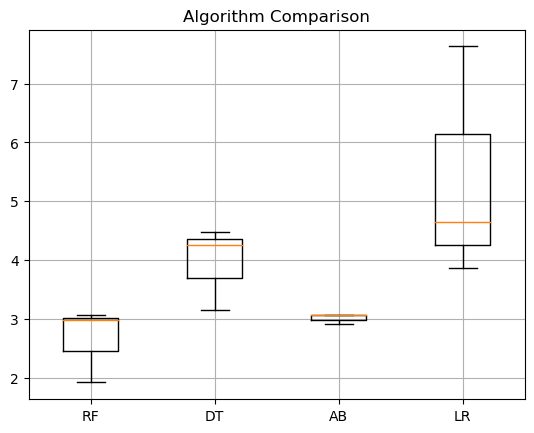

In [338]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Next we create a training and test pair with 80 / 20 proportions
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

models = []
models.append(('RF', RandomForestRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('AB', AdaBoostRegressor()))
models.append(('LR', LinearRegression()))

results = []
names = []
kfold = KFold(n_splits=3, random_state=1, shuffle=True)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print('%s: RMSE %f' % (name, np.sqrt(np.abs(cv_results.mean()))))

# Compare Algorithms
results = [np.sqrt(np.abs(i)) for i in results] 

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.grid()
plt.show()

## Alternative Input Formats

One of the more challening things when working with data is that some methods seem to want the input in a certain format. Let's revisit the opening section when we separated the mtcars data into X and y which is the preferred way of indicating what is being used to predict and outcome. 

In using various scikit functions, I find myself having to reshape the data or turning it into an array to accomodate the input requirements of various functions. In all fairness, I have had to do the same thing when using R so it's not unique to a given language. 

In [339]:
y = mtcars.mpg
X = mtcars.drop('mpg',axis=1)

# X is a pandas dataframe
print("X is of type:",type(X))

# y is a Series which is comparable to a vector in R
print("y is of type:",type(y))

# Next we create a training and test pair with 80 / 20 proportions
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Create and fit the model
lr_mod = LinearRegression()
lr_mod.fit(X_train,y_train)

# Do some scoring
y_lr_preds = lr_mod.predict(X_test)


from sklearn.metrics import mean_squared_error

# By keeping X as a data frame we retian the colnames
print(X.columns)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_lr_preds)))

X is of type: <class 'pandas.core.frame.DataFrame'>
y is of type: <class 'pandas.core.series.Series'>
Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')
RMSE:  3.6381634813727466


So compare this to the version we used earlier when we first converted the mtcars data frame into a numpy array. At this point things still work although we have lost the feature names in the X input which is now an array. You might feel that this is academic but later when we look at classification predictions, you will see that knowing how to reshape and manipulate X and y will come in handy as you use various functions in scikit. 

In [340]:
mtvals = mtcars.values            # creates a numpy array

# note we have to index by number since the names are no longer available
y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

# X is a numpy array
print("X is of type:",type(X))

# y is a numpy array
print("y is of type:",type(y))

# Next we create a training and test pair with 80 / 20 proportions
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Create and fit the model
lr_mod = LinearRegression()
lr_mod.fit(X_train,y_train)

# Do some scoring
y_lr_preds = lr_mod.predict(X_test)

from sklearn.metrics import mean_squared_error
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_lr_preds)).round(3))

X is of type: <class 'numpy.ndarray'>
y is of type: <class 'numpy.ndarray'>
RMSE:  2.852


## Transformers 

One thing we could do is to apply transformation techniques (aka "transformers") to pre-process the data. You might be thinking of this type of transfomer:

<center><img src="./pics/ch_5_transformers.png" width="300" height="300"></center>

Transformers are scikit methods that allow us to "pre-treat" data before we use it to **fit** and estimator. There can be many transformers depending on what it is you wish to do.

In particular, scaling data is a common activity. It's important to scale AFTER the segmentation of the data into training and test sets because if we don't then the scaling will have a "knowledge" of the distribtuion in the test data which will influence the model. 

Note: I sometimes forget to do this but (it happens to everyone) but it is one of the biggest sources of "Data Leakage". We'll explore this issue in a later lecture. The goal of this section is just to show how you CAN transform data prior to fitting.

In [341]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Let's scale the X training data - we need to fit AND transform it
X_train_transformed = scaler.fit_transform(X_train)
model = LinearRegression().fit(X_train_transformed, y_train)

# Note that we can now make a prediction but need to just transform
# the data on X_test

X_test_transformed = scaler.transform(X_test)
mean_squared_error(y_test, model.predict(X_test_transformed))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, model.predict(X_test_transformed))).round(3))

RMSE:  2.852


We will explore this in greater detail later but the larger point is that we can use a number of transformers as part of a pipeline to process datsa prior to using it in a model. 


## Preventing Data Leakage

Data Leakage occurs when we have information from a test set somehow influencing the model that is built on the training set. In our above approach, we are splitting the data set into folds using methods from scikit-learn which is fine however each test fold is also being use K-1 times as part of the training set which means that we are in effect training our model using data that we've seen before. Once way to address this is to adopt the following approach:

<img src="pics/kf33.png" width ="600" height=600>

The advantage here is that we carve out a test data frame that is not used in anyway to train the model or participates in the cross validation process. After we have generated a good estimate of RMSE using our training data and K-fold validation we can THEN apply any resulting model the holdout test data frame. 

Question: If we wanted to scale the data, what would be the best point to do it ? 



In [366]:
mtvals = mtcars.values  # Create an array version of the data
y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

# Now create training and testing
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20)

# Now do some K-fold validation - well try this for both X and X_train
reg = LinearRegression()
cross_val_scores = cross_val_score(reg, 
                                   X_train, 
                                   y_train, 
                                   scoring='neg_mean_squared_error',
                                   cv=kf, 
                                   n_jobs=-1)
print("Mean RMSE for cross_val_score is %f " % sqrt(mean(absolute(cross_val_scores))))

Mean RMSE for cross_val_score is 3.432960 


In [367]:
test_preds = reg.fit(X_train,y_train).predict(X_test)
round(mean_squared_error(y_test,test_preds)**0.5,2)

3.8

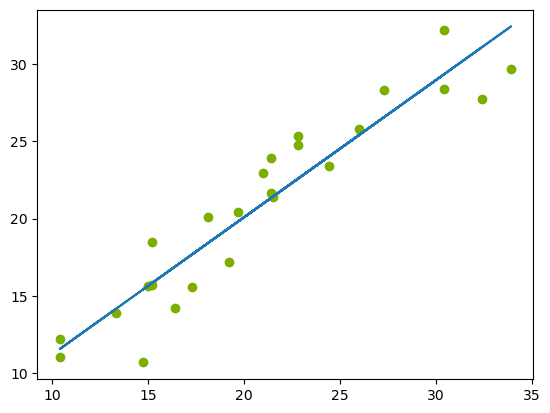

In [368]:
plt.scatter(x=y_train,y=reg.fit(X_train,y_train).predict(X_train),c="#7CAE00")
z = np.polyfit(y_train,reg.fit(X_train,y_train).predict(X_train),1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train))
plt.show()

## Data Sets

Scikit comes with a number of data sets which can be used to test and practice various machine learning activities. You will see these referred to in the scikit documentation as well as examples on the Internet. These datasets reside in the sklearn.datasets module.

**load_boston(*[, return_X_y])** - boston house-prices dataset (regression).

**load_iris(*[, return_X_y, as_frame])** - iris dataset (classification).

**load_diabetes(*[, return_X_y, as_frame])** - diabetes dataset (regression).

**load_digits(*[, n_class, return_X_y, as_frame])** - the digits dataset (classification).

**load_linnerud(*[, return_X_y, as_frame])** - physical excercise linnerud dataset.

**load_wine(*[, return_X_y, as_frame])** - wine dataset (classification).

**load_breast_cancer(*[, return_X_y, as_frame])** - breast cancer wisconsin dataset (classification).

In [369]:
from sklearn.datasets import fetch_california_housing
cfh = fetch_california_housing()
print(cfh.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [370]:
house_data = pd.DataFrame(cfh.data, columns=cfh.feature_names)
#house_data['MedHouseVal'] = cfh.target

In [371]:
# Let's predict Median value of owner-occupied homes in $1000's

X = cfh.data
y = cfh.target

In [372]:
# Now create training and testing
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16512, 8) (4128, 8)
(16512,) (4128,)


In [373]:
from sklearn.metrics import mean_squared_error
lm_model = LinearRegression()
lm_model = model.fit(X,y)

# Get the training RMSE
y_train_preds = lm_model.predict(X_train)
rmse = mean_squared_error(y_train,y_train_preds,squared=True)
print("Training RMSE is:", rmse.round(3),"\n")

# Get the Testing RMSE
y_test_preds = lm_model.predict(X_test)
rmse = mean_squared_error(y_test,y_test_preds,squared=True)
print("Testing  RMSE is:", rmse.round(3),"\n")

rmse= mean_squared_error(y_test,y_test,squared=True)


Training RMSE is: 0.529 

Testing  RMSE is: 0.505 



([<matplotlib.axis.XTick at 0x1485daca0>,
 [Text(0, 0, 'MedInc'),
  Text(1, 0, 'HouseAge'),
  Text(2, 0, 'AveRooms'),
  Text(3, 0, 'AveBedrms'),
  Text(4, 0, 'Population'),
  Text(5, 0, 'AveOccup'),
  Text(6, 0, 'Latitude'),
  Text(7, 0, 'Longitude')])

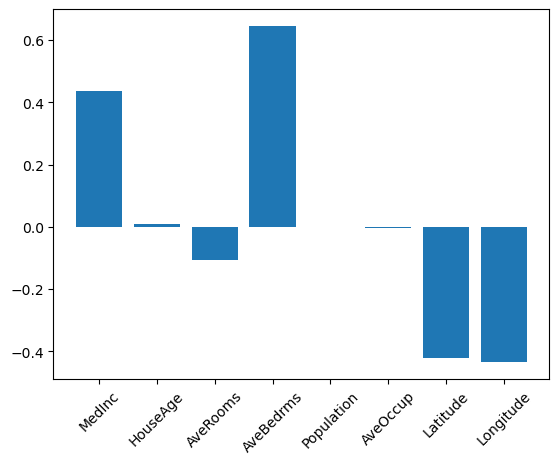

In [374]:
importance = model.coef_

plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], house_data.columns.values.tolist(),rotation=45)

In [375]:
# Now create training and testing
#X_train, X_test, y_train, y_test = train_test_split(X,
#                                                    y,
#                                                    test_size=0.20)

# Now do some K-fold validation - well try this for both X and X_train
reg = LinearRegression()
cross_val_scores = cross_val_score(lm_model, 
                                   X_train, 
                                   y_train, 
                                   scoring='neg_mean_squared_error',
                                   cv=kf, 
                                   n_jobs=-1)
print("Mean RMSE for cross_val_score is %f " % sqrt(mean(absolute(cross_val_scores))))

Mean RMSE for cross_val_score is 0.729610 


In [376]:
test_preds = reg.fit(X_train,y_train).predict(X_test)
round(mean_squared_error(y_test,test_preds)**0.5,2)

0.71

## Summary

Let's tie some of this together in another example

In [377]:
import pandas as pd
import numpy as np

# Get some graphics action happening
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization

# Get some Decision Tree modules loaded
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Get the train test function
from sklearn.model_selection import train_test_split

# Get the cross_val_score function for cross fold validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Get the MSE function for use with the test predictions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

<img src="./pics/flow2.png" width=700 height=700>


Let's break out the data into what is being predicted (the target) vs what we are using to make the predictions (the features). We'll use the **concrete** data set from the [UCI Machine Learning Data set resource](https://archive.ics.uci.edu/ml/index.php)

<img src="./pics/ccs.png" width=700 height=700>

In [399]:
# See https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/concrete_uci_data.csv"
concrete = pd.read_csv(url)

# Separate the target from the predictors
y = concrete.strength         # Gets the strength column
X = concrete.drop('strength',axis=1)     # Gets everything BUT the strength colum

# check out the shape 
print(X.shape)
print(y.shape)

(1030, 8)
(1030,)


In [400]:
concrete

,cement,bf_slag,fly_ash,water,super,coarse,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<img src="./pics/cdescr.png" height=600 width=600>
<img src="./pics/cc2.png" height=600 width=600>

Text(0.5, 1.0, 'Concrete Strength')

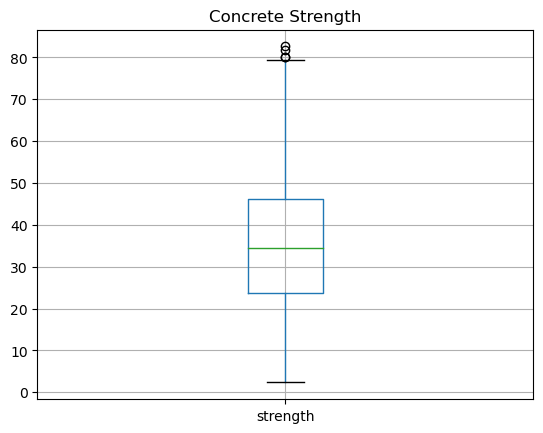

In [401]:
concrete.boxplot("strength")
plt.title('Concrete Strength')

<Axes: >

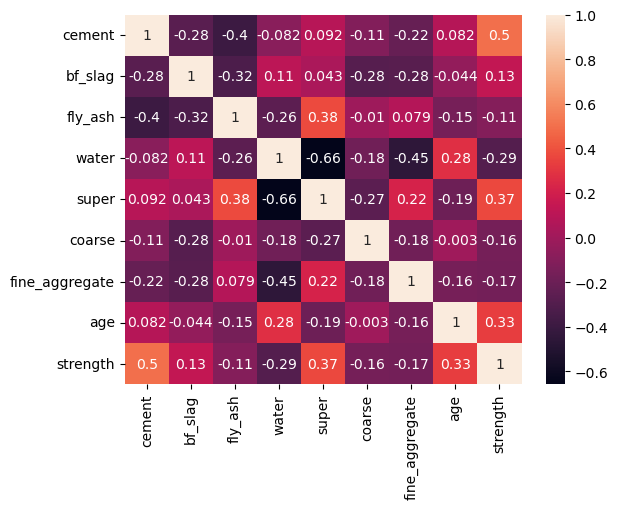

In [218]:
#ploting the heatmap for correlation 
sns.heatmap(concrete.corr(), annot=True) 

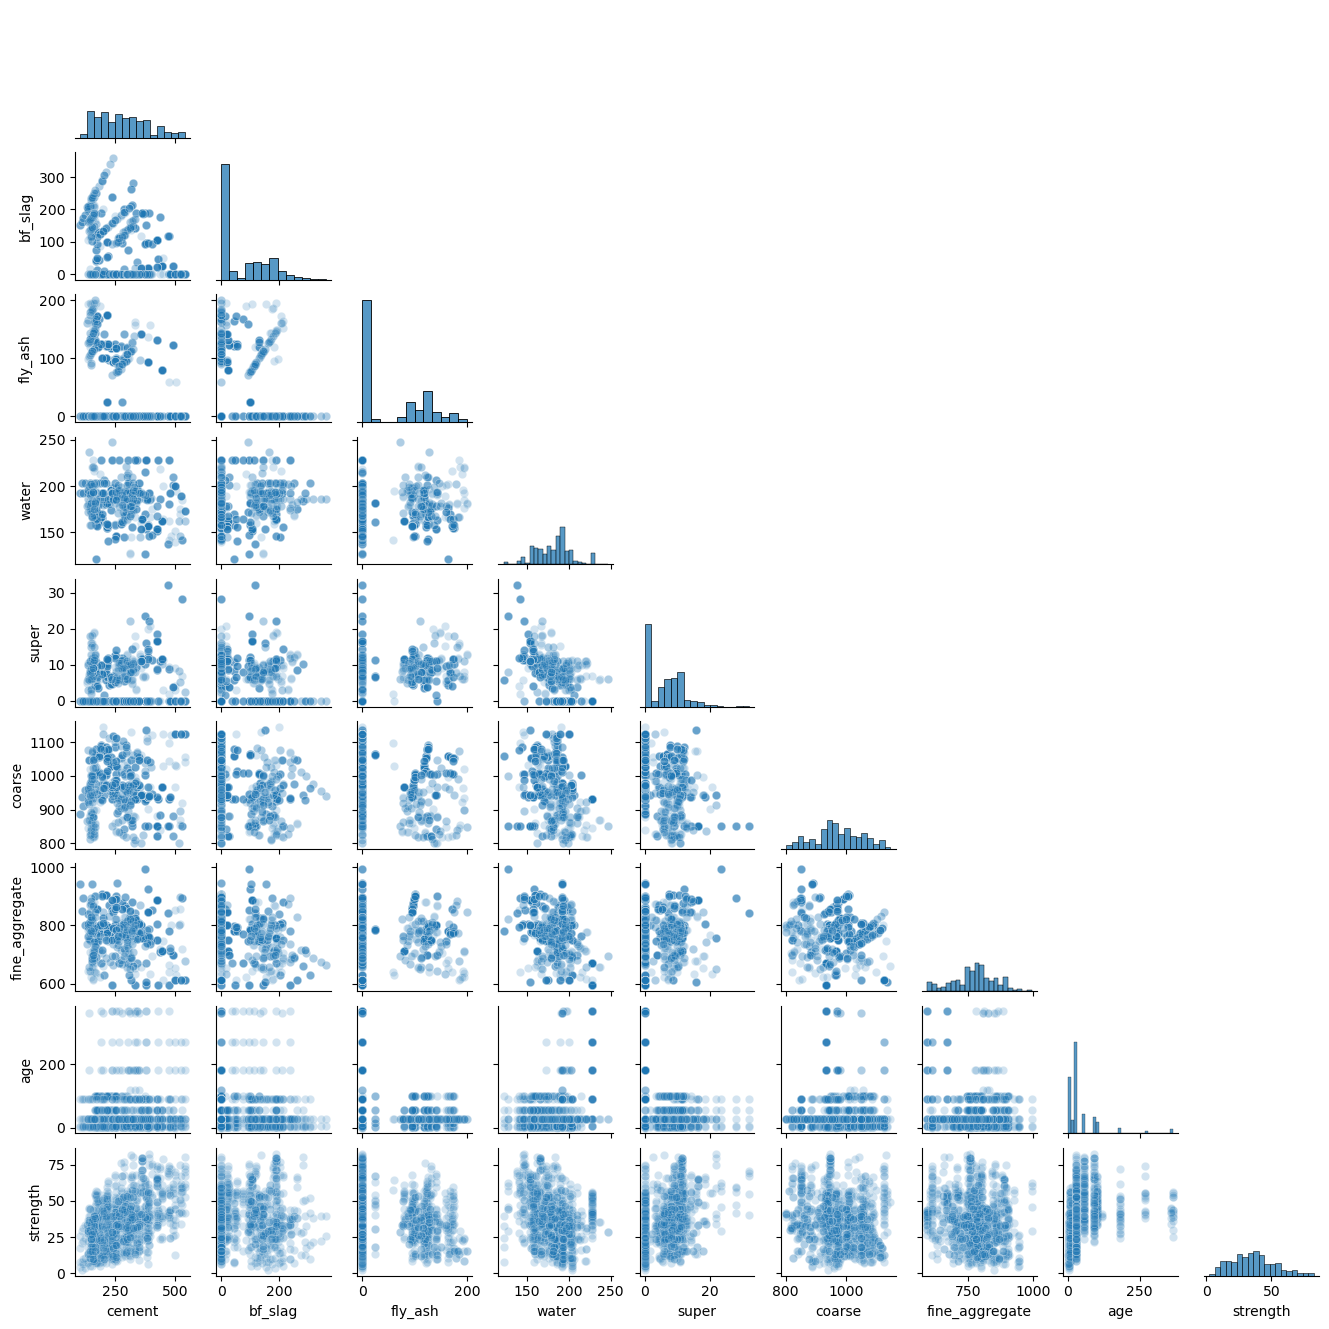

In [86]:
# According to the reference, 
# "The concrete compressive strength is a highly nonlinear function of age and ingredients"

sns.pairplot(concrete,corner=True, plot_kws={'alpha':.2},height=1.5)

Sometimes your data will fall into known distributions in which case you could leverage that when building a model since established distributions have known parameters and predictable behaviors. More commonly though, your data might be "close" to a known distribution in which case you could consider transforming it in some way (log, square root, inverse) to "nudge" it into a known distribution pattern. 

<img src="./pics/distributions.png" height=600 width=600>

Okay so let's pick one of the features, **bf_slag**, and see if we could transform one of them to make it look more "normal".

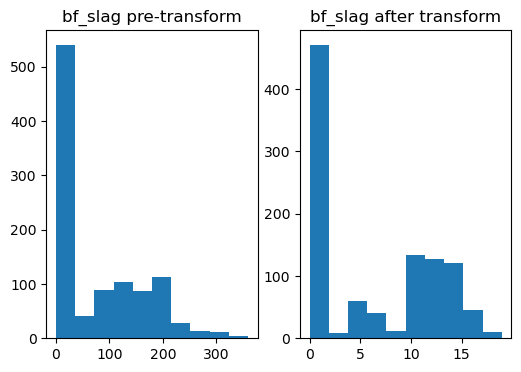

In [386]:
fig, ax = plt.subplots(1,2, figsize= (6,4))
ax[0].hist(concrete.bf_slag)
ax[0].set_title("bf_slag pre-transform")
ax[1].hist(np.sqrt(concrete.bf_slag))
ax[1].set_title('bf_slag after transform')
plt.show()

### Get Training and test data

We'll leave feature engineering for another discussion. Let's now create a training / test pair

In [410]:
# Get a training set of roughly 80% of the data. The other 20% goes to the test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=23)
print(X_train.shape)
print(X_test.shape)

(824, 8)
(206, 8)


In [411]:
# Setup a new model
# Because we know there is non-linearity, let's try A Decision Tree.

dt_model =  DecisionTreeRegressor()

# fit the model
dt_model.fit(X_train,y_train)

# Do a prediction
y_preds = dt_model.predict(X_train)

# Get root mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_train, y_preds)))

Root Mean squared error: 1.06


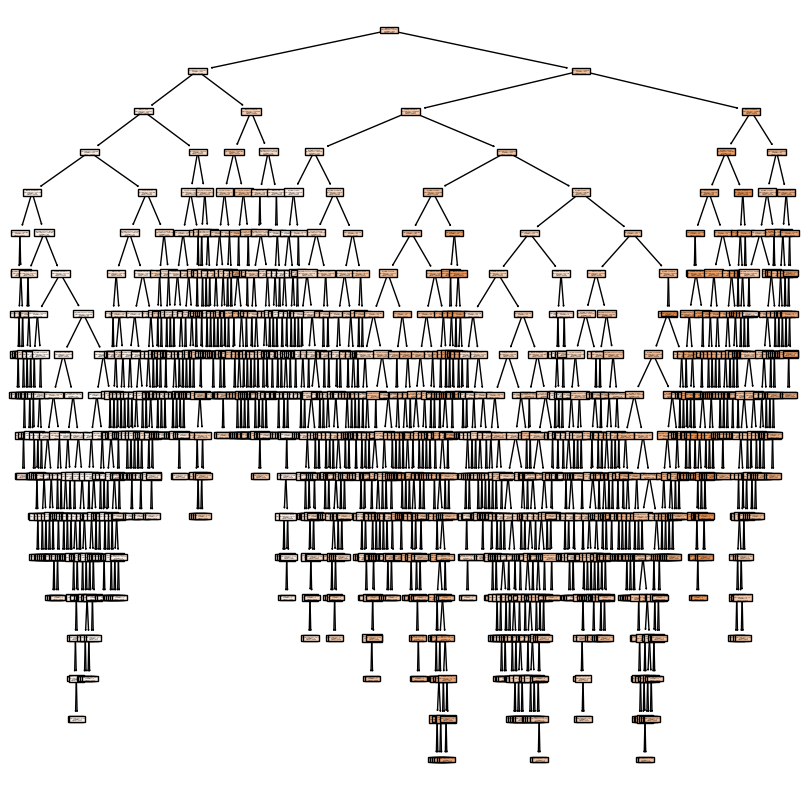

In [412]:
plt.figure(figsize=(10,10))
myt = tree.plot_tree(dt_model,feature_names=list(concrete.columns[0:8]),filled=True)

So this is cool but it doesn't help us when trying to determine how well this model might apply to some unseen data. For that we need to apply the model to our test set.

In [413]:
# Do a prediction
y_test_preds = dt_model.predict(X_test)

# Maybe check out the RMSE
print("TEST RMSE is:", np.sqrt(mean_squared_error(y_test_preds,y_test)).round(3))

TEST RMSE is: 6.851


But that was only one view of the data. Let's look at the performance across a number of folds.

In [414]:
num_splits = 10
kf = KFold(n_splits=num_splits)
scores = cross_val_score(dt_model, 
                         X_train, 
                         y_train, 
                         scoring='neg_mean_squared_error', 
                         cv=10)
scores

array([-51.26048434, -69.37346024, -16.51086265, -47.27531446,
       -33.69835061, -48.22420366, -55.14385915, -30.92213537,
       -42.52319634, -38.18360122])

But these are negative. That's because this is a cost function. Don't worry about that. Just take the negative of these values and then compute the RMSE.

In [415]:
print("Average RMSE training error across %d folds is %.3f" % 
      (num_splits,np.sqrt(-np.mean(scores)).round(3)))

Average RMSE training error across 10 folds is 6.581


In [416]:
y_test_preds = dt_model.predict(X_test)
test_mse = mean_squared_error(y_test,y_test_preds)

#
print("RMSE test error across %d folds is %.3f" % 
      (num_splits,np.sqrt(test_mse.round(3))))

RMSE test error across 10 folds is 6.851


In [417]:
def test_valid(X, y, X_test, y_test,
               max_features=None, min_samples_leaf=1):
    
    dt = DecisionTreeRegressor(max_features=max_features, 
                              min_samples_leaf=min_samples_leaf)
    # Do the fitting
    dt.fit(X, y)
    
    # Get the depth of the tree
    depth = dt.get_depth()
    
    # Do the test predictions
    y_pred = dt.predict(X_test)
    
    # Get the rmse for the predictions
    rmsle_valid = np.sqrt( mean_squared_error(y_test, y_pred) )
    
    # Get the R^2
    r2_score_valid = dt.score(X_test,y_test)
    return dt, r2_score_valid, rmsle_valid, depth

In [418]:
ll = []
maxf = None
for minleaf in range(1,7):
    (rf, r2_score_valid, rmsee, depth) = test_valid(X_train, y_train, X_test, y_test, 
                                                    max_features=None, 
                                                    min_samples_leaf=minleaf)
    ll.append((r2_score_valid, rmsee, depth))

df = pd.DataFrame(ll, columns=['train_rmse', 'test_rmse', 'depth'])

# Print the data frame showing the lowest test_rmse
print(df.sort_values(by="test_rmse"))

   train_rmse  test_rmse  depth
0    0.843547   6.807013     18
1    0.833057   7.031506     16
2    0.823238   7.235339     14
3    0.812329   7.455247     13
4    0.801490   7.667528     12
5    0.794647   7.798570     12


We'll handle trees in greater depth (no pun intended) later but there are a couple of things we could do to perhaps improve our model. Improve in the sense that it might be more realistic when applied to unseen data. 

1. Limit the depth of the tree. This reduces the number of choices to be made 
2. Require the leaf nodes to have more examples. This means that we might have more info in a leaf than there needs to be to do the job.
3. We could limite the number of features under consideration.
4. A combination of all the above. 

### Making Data Sets

sklearn has the ability to create example data sets for regression or classification. We can use this with a variety of methods. In tis case we can use a Multi Layer Perceptron model. 

In [229]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, n_features=5, random_state=1)
print(X.shape)
print(y.shape)

(200, 5)
(200,)


In [230]:
print("X:\n",X[0:5],"\n")

print("y\n",y[0:5],"\n")

X:
 [[-0.42914228  0.05340954  0.01716473  0.35016716 -0.4791571 ]
 [-0.3198016  -0.22631424  0.68006984 -0.28730786  1.33145711]
 [ 0.14010988  1.06898597  1.81252782  0.93514778 -0.20975294]
 [-1.4614036  -1.07296428 -0.51814555 -0.9520621   0.49515861]
 [ 0.69257435 -0.10646012 -0.97989025 -0.45611756 -2.79099641]] 

y
 [ -27.56869311   97.48372741  220.59655073 -143.20563531 -213.46129791] 



In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=9000).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

0.9994114481332468

In [117]:
X_test[:2]

array([[-1.50957268,  0.18986165,  0.74335654, -0.10193204,  0.7980638 ],
       [ 1.91979229,  0.39788042,  2.50598029, -1.19586151, -0.99601089]])